<a href="https://colab.research.google.com/github/Lucas-Melo-A-S/Data_Science/blob/main/Propensa%CC%83o%20de%20Compras%20de%20Produtos%20Banca%CC%81rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Propensão de Compras de Produtos Bancários


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import itertools
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Importando Dados

df = pd.read_csv('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/Dados/bank-additional-full.csv',sep = ';')

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Quanto aos metadados fornecidos no próprio conjunto de dados, temos:


  •	O arquivo principal (“bank-additional-full.csv”) contém 41.188 observações e 20 entradas de atributos de entrada, ordenadas por data (de maio de 2008 até novembro de 2010).  


  •	As variáveis de entrada incluem: dados do cliente (por exemplo age, job, marital, education, default, housing, loan), informação da última chamada da campanha (contact, month, day_of_week, duration), outras variáveis da campanha (campaign, pdays, previous, poutcome) e indicadores sociais/econômicos (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed).


  •	A variável-alvo é y, que indica se o cliente subscreveu o depósito a prazo (“yes” ou “no”).


  • O atributo duration (duração da última chamada) apresenta alta correlação com a variável-alvo, mas não estaria disponível antes da chamada — o que implica que seu uso direto na modelagem preditiva pode enviesar o modelo para fins práticos.


  • O atributo pdays informa o número de dias desde a última vez que o cliente foi contatado numa campanha anterior e este possui um caractere especial '999' que sinaliza aqueles clientes que nunca foram contactados

  A descrição de cada atributo pode ser encontrado no site do [Kaggle](https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing)




In [ ]:

def missing_values_table(df):

  metadados = pd.DataFrame({
      'nome_variavel': df.columns,
      'tipos_de_dados': df.dtypes,
      'numero_de_missing': df.isnull().sum(),
      'percentual_de_missing': df.isnull().sum() * 100 / len(df),
      'unknown': df.isin(['unknown']).sum(),
      'percentual_unknown': df.isin(['unknown']).sum() * 100 / len(df),
      'numero_de_unicos': df.nunique(),
  })

  metadados = metadados.sort_values(by='numero_de_missing', ascending=False).round(1)
  metadados = metadados.reset_index(drop=True)

  return metadados

metadados = missing_values_table(df)
metadados.head(21)

,nome_variavel,tipos_de_dados,numero_de_missing,percentual_de_missing,unknown,percentual_unknown,numero_de_unicos
0,age,int64,0,0.0,0,0.0,78
1,job,object,0,0.0,330,0.8,12
2,marital,object,0,0.0,80,0.2,4
3,education,object,0,0.0,1731,4.2,8
4,default,object,0,0.0,8597,20.9,3
5,housing,object,0,0.0,990,2.4,3
6,loan,object,0,0.0,990,2.4,3
7,contact,object,0,0.0,0,0.0,2
8,month,object,0,0.0,0,0.0,10
9,day_of_week,object,0,0.0,0,0.0,5


- Pode ser verificado que nos atributos cardinais se tem uma grande presença do dado 'unknown';

- Pode ser verificado que o atributo tyaregt ('y') também é cardinal, entretanto esse não possui nenhum valor vazio ou valor 'unknown';

- Levando em consideração que esse 'unknown' representa dados não informados, as colunas que possuem alto percentual de 'unknown' serão apagadas.

In [ ]:
#Verificando pdays

df['pdays'].value_counts()

,count
pdays,
999,39673
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


- Conforme falado no metadados, o atributo 'pdays' possui uma dado especial '999' e este é o dado mais presente no atributo 'pdays'

- Para essa situação o caractere especial será transformado em nan, já que o caractere significa que não foi realizado contato inicial.

### Adequando Features

In [ ]:
#Transformando os dados do atributo target em numeros

df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
#Excluindo coluna duration

df = df.drop('duration', axis = 1)

In [ ]:
# Apagando todas as linhas que possuem 'unknown'

df = df[~df.apply(lambda row: row.astype(str).str.lower().str.contains('unknown').any(), axis=1)]

In [ ]:
df.shape

(30488, 20)

- Após a retirada do numero nulos, teve um descrescimo de 10700 dados.

## Data Prep

In [ ]:
from sklearn.model_selection import train_test_split
#Separando dados para treino e teste

train, test = train_test_split(df, test_size=0.3, random_state=42)
train.shape,test.shape


((21341, 20), (9147, 20))

In [ ]:
#Fazendo uma copia do dataset original

df_01 = train.copy()

In [ ]:
#Substituindo o 999 por missing

df_01['pdays'].replace(999, np.nan, inplace=True)


/tmp/ipython-input-3145036976.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_01['pdays'].replace(999, np.nan, inplace=True)


In [ ]:
#Substituindo o 99 por missing (test)

df_test_01 = test.copy()
df_test_01['pdays'].replace(999, np.nan, inplace=True)

/tmp/ipython-input-2620251565.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_01['pdays'].replace(999, np.nan, inplace=True)


In [ ]:
df_01.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39066,52,technician,married,high.school,no,no,no,cellular,dec,fri,1,NaN,1,failure,-3.0,92.713,-33.0,0.710,5023.5,1
3004,27,blue-collar,married,basic.9y,no,yes,no,telephone,may,wed,2,NaN,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
20470,48,blue-collar,married,basic.9y,no,yes,no,cellular,aug,tue,1,NaN,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
38979,25,admin.,single,university.degree,no,no,no,cellular,dec,fri,2,NaN,0,nonexistent,-3.0,92.713,-33.0,0.718,5023.5,0
1847,28,blue-collar,single,basic.9y,no,yes,no,telephone,may,fri,3,NaN,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


In [ ]:
#Avaliando o Banco de Dados

metadados = missing_values_table(df_01)
metadados.head(21)

,nome_variavel,tipos_de_dados,numero_de_missing,percentual_de_missing,unknown,percentual_unknown,numero_de_unicos
0,pdays,float64,20421,95.7,0,0.0,24
1,age,int64,0,0.0,0,0.0,75
2,marital,object,0,0.0,0,0.0,3
3,job,object,0,0.0,0,0.0,11
4,education,object,0,0.0,0,0.0,7
5,default,object,0,0.0,0,0.0,2
6,loan,object,0,0.0,0,0.0,2
7,housing,object,0,0.0,0,0.0,2
8,contact,object,0,0.0,0,0.0,2
9,month,object,0,0.0,0,0.0,10


Com a substituição do '999' por Nan, foi possivel observar que esse atributo possui uma grande quantidade de valores nulos, sendo assim necessário fazer um filtro para saber se este atributo continuará ou não no processo.

### Retirando variaveis com mais de 60% de nulos


In [ ]:
#Verificando atributos com missing

missing_cutoff = 60 #Limite minimo para que seja retirado a coluna inteira

drop_vars_nulos = metadados[(metadados['percentual_de_missing'] >= missing_cutoff)]
lista_drop_vars = list(drop_vars_nulos.nome_variavel.values)

print('Variáveis que serão excluídas por alto percentual de nulos: ',lista_drop_vars)

# retirando lista de variáveis com alto percentual de nulos

df_02 = df_01.drop(axis=1,columns=lista_drop_vars)
df_02.shape

Variáveis que serão excluídas por alto percentual de nulos:  ['pdays']


(21341, 19)

In [ ]:
#Salvando a lista de colunas a serem retiradas em pickle

with open('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/Pickle/prd_drop_null_a01.pkl', 'wb') as d:
    pickle.dump(lista_drop_vars, d)

### Tirando o target da data prep

In [ ]:
#Tirando o target do data prep

df_02 = df_02.drop('y', axis = 1)

In [ ]:
metadados = missing_values_table(df_02)

-Fazendo uma breve analise na tabela, podemos verificar que os atributos  categoricos possuem uma baixa cardinalidade (<20), com isso só será necessário fazer o tratamento delas como OneHotEnconder

### Tratamento para features Categoricas de Baixa Cardinalidade

In [ ]:
import pickle
from sklearn.preprocessing import OneHotEncoder


card_cutoff = 15 #variavel que dá o limita a quantidade de valores nulos

df_categ_onehot = metadados[(metadados['numero_de_unicos'] <= card_cutoff) & (metadados['tipos_de_dados'] == 'object')]
lista_onehot = list(df_categ_onehot.nome_variavel.values)
print('Lista de vars para OneHot Encoding: ',lista_onehot)

# Instanciando o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicando o one-hot encoding
encoded_data = encoder.fit_transform(df_01[lista_onehot])
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df_01.index)

df_03 = pd.concat([df_02.drop(lista_onehot, axis=1), encoded_df], axis=1)

#Salva o encoder e a lista de colunas em um arquivo .pkl
data_to_serialize = {
  'encoder': encoder,
  'columns': lista_onehot}


#Salvando o dicionário de enconder e suas colunas
with open('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/Pickle/prd_onehotenc_a01.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)

Lista de vars para OneHot Encoding:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [ ]:
df_03.shape

(21341, 45)

In [ ]:
  df_03.head()


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
39066,52,1,1,-3.0,92.713,-33.0,0.710,5023.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3004,27,2,0,1.1,93.994,-36.4,4.859,5191.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
20470,48,1,0,1.4,93.444,-36.1,4.966,5228.1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
38979,25,2,0,-3.0,92.713,-33.0,0.718,5023.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1847,28,3,0,1.1,93.994,-36.4,4.855,5191.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Carregar os encoders e a lista de colunas
with open('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/Pickle/prd_onehotenc_a01.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoder = loaded_data['encoder']
loaded_columns = loaded_data['columns']

# Suponha test_df como sua base de teste
encoded_data_test = loaded_encoder.transform(df_test_01[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=df_test_01.index)

df_test_02 = pd.concat([df_test_01.drop(loaded_columns, axis=1), encoded_df_test], axis=1)


In [ ]:
df_test_02.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
8688,27,1,NaN,0,1.4,94.465,-41.8,4.864,5228.1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
18409,27,1,NaN,0,1.4,93.918,-42.7,4.968,5228.1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
18374,37,2,NaN,0,1.4,93.918,-42.7,4.968,5228.1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
39804,29,2,6.0,1,-1.7,94.055,-39.8,0.704,4991.6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10746,28,3,NaN,0,1.4,94.465,-41.8,4.961,5228.1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Padronização

In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler

# Instanciando o scaler
scaler = StandardScaler()

# Padronizando a base de treino
df_03_scaled = scaler.fit_transform(df_03)
df_04 = pd.DataFrame(df_03_scaled, columns=df_03.columns, index=df_03.index)

# Salva o scaler em um arquivo .pkl
with open('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/Pickle/prd_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
df_04.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
39066,1.240902,-0.553751,1.556603,-1.814749,-1.383202,1.585218,-1.544546,-1.819797,-0.478134,-0.190057,...,-0.683475,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,-0.492285,-0.500571,-2.358907,-0.201917
3004,-1.164348,-0.189808,-0.372630,0.731336,0.803766,0.875582,0.789797,0.404991,2.091462,-0.190057,...,1.463110,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,-0.492285,1.997719,0.423925,-0.201917
20470,0.856062,-0.553751,-0.372630,0.917635,-0.135214,0.938196,0.849998,0.897765,2.091462,-0.190057,...,-0.683475,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,2.031342,-0.500571,0.423925,-0.201917
38979,-1.356768,-0.189808,-0.372630,-1.814749,-1.383202,1.585218,-1.540045,-1.819797,-0.478134,-0.190057,...,-0.683475,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,-0.492285,-0.500571,0.423925,-0.201917
1847,-1.068138,0.174135,-0.372630,0.731336,0.803766,0.875582,0.787546,0.404991,2.091462,-0.190057,...,1.463110,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,-0.492285,-0.500571,0.423925,-0.201917


In [ ]:
# colunas que foram retiradas da tabela:

list_columns_drop = ['y','pdays']
df_test_aux = df_test_02.drop(axis=1,columns=list_columns_drop)

In [ ]:
with open('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/Pickle/prd_scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Suponha test_df como sua base de teste
test_df_scaled = loaded_scaler.transform(df_test_aux)
test_df = pd.DataFrame(test_df_scaled, columns=df_test_aux.columns, index=df_test_aux.index)
test_df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
8688,-1.164348,-0.553751,-0.372630,0.917635,1.607873,-0.251488,0.792610,0.897765,-0.478134,-0.190057,...,-0.683475,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,-0.492285,1.997719,0.423925,-0.201917
18409,-1.164348,-0.553751,-0.372630,0.917635,0.674016,-0.439333,0.851123,0.897765,2.091462,-0.190057,...,-0.683475,-0.362696,-0.148094,-0.130062,-0.510799,1.945502,-0.492285,-0.500571,0.423925,-0.201917
18374,-0.202248,-0.189808,-0.372630,0.917635,0.674016,-0.439333,0.851123,0.897765,-0.478134,5.261572,...,-0.683475,-0.362696,-0.148094,-0.130062,-0.510799,1.945502,-0.492285,-0.500571,0.423925,-0.201917
39804,-0.971928,-0.189808,1.556603,-1.007454,0.907907,0.165945,-1.547922,-2.243503,-0.478134,-0.190057,...,-0.683475,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,-0.492285,1.997719,-2.358907,4.952526
10746,-1.068138,0.174135,-0.372630,0.917635,1.607873,-0.251488,0.847185,0.897765,-0.478134,-0.190057,...,-0.683475,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,2.031342,-0.500571,0.423925,-0.201917


### Trazendo ID e Target para o banco de dados após o dataprep

In [ ]:
#### Trazer o target para a tabela pós dataprep

abt_train = df_04.merge(train[['y']], left_index=True, right_index=True, how='inner')
abt_test = test_df.merge(test[['y']], left_index=True, right_index=True, how='inner')

### Salvando Novo Banco de Dados

In [ ]:
abt_train.to_csv('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/abt_train.csv', index=False)
abt_test.to_csv('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/abt_test.csv', index=False)

## Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
abt_train.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
39066,1.240902,-0.553751,1.556603,-1.814749,-1.383202,1.585218,-1.544546,-1.819797,-0.478134,-0.190057,...,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,-0.492285,-0.500571,-2.358907,-0.201917,1
3004,-1.164348,-0.189808,-0.372630,0.731336,0.803766,0.875582,0.789797,0.404991,2.091462,-0.190057,...,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,-0.492285,1.997719,0.423925,-0.201917,0
20470,0.856062,-0.553751,-0.372630,0.917635,-0.135214,0.938196,0.849998,0.897765,2.091462,-0.190057,...,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,2.031342,-0.500571,0.423925,-0.201917,0
38979,-1.356768,-0.189808,-0.372630,-1.814749,-1.383202,1.585218,-1.540045,-1.819797,-0.478134,-0.190057,...,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,-0.492285,-0.500571,0.423925,-0.201917,0
1847,-1.068138,0.174135,-0.372630,0.731336,0.803766,0.875582,0.787546,0.404991,2.091462,-0.190057,...,-0.362696,-0.148094,-0.130062,-0.510799,-0.514006,-0.492285,-0.500571,0.423925,-0.201917,0


In [ ]:
X = abt_train.drop(axis=1,columns='y')
y = abt_train.y

In [ ]:
clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

Número de features selecionadas:  6


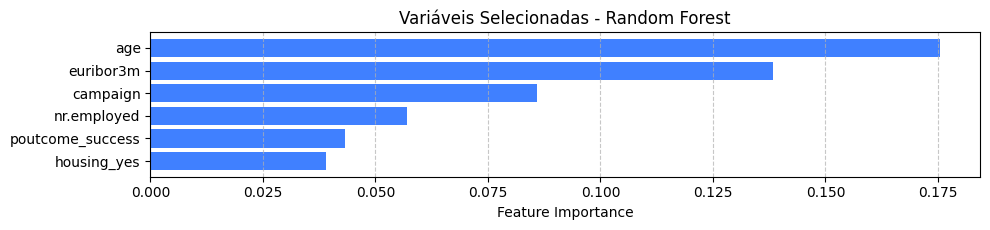

In [ ]:
# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.2

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Salvando a lista de variaveis em um arquivo pickle

with open ('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/Pickle/prd_feature_selection.pkl', 'wb') as fs:
  pickle.dump(selected_features,fs)

In [ ]:
#Carregando a lista de variaveis

with open ('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/Pickle/prd_feature_selection.pkl', 'rb') as fs:
  loaded_list = pickle.load(fs)

In [ ]:
#Criando um novo banco de dados a partir das variaveis selecionadas + variavel target

lista_feature = loaded_list + ['y']
abt_train_01 = abt_train[lista_feature]

In [ ]:
abt_test_01 = abt_test[lista_feature]

abt_test_01.head()

,age,campaign,euribor3m,nr.employed,housing_yes,poutcome_success,y
8688,-1.164348,-0.553751,0.792610,0.897765,0.922274,-0.201917,0
18409,-1.164348,-0.553751,0.851123,0.897765,-1.084276,-0.201917,0
18374,-0.202248,-0.189808,0.851123,0.897765,0.922274,-0.201917,1
39804,-0.971928,-0.189808,-1.547922,-2.243503,0.922274,4.952526,1
10746,-1.068138,0.174135,0.847185,0.897765,-1.084276,-0.201917,0


In [ ]:
# Salvando novo banco de dados (csv)

abt_train_01.to_csv('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/abt_feature_selection.csv')
abt_test_01.to_csv('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/abt_fselection_test.csv')

## Modelo (Dados Desbalanceados)

Para uma melhor compreensão do processo, será realizado um teste de desempenho comparando dois tipos de modelos: um com dados balanceados e outro com dados desbalanceados.

No modelo balanceado, a variável alvo (target) apresenta uma quantidade semelhante de eventos e não eventos, o que proporciona maior equilíbrio durante a modelagem e possibilita a utilização de uma gama mais ampla de algoritmos. Esse balanceamento contribui para que o modelo aprenda de forma mais uniforme as características de ambas as classes.

Já no modelo desbalanceado, há uma discrepância entre o número de eventos e não eventos — refletindo a situação real dos dados, em que determinados eventos podem ser raros. Apesar de representar melhor o comportamento real do problema, esse tipo de distribuição pode impactar negativamente o desempenho de alguns modelos, que tendem a favorecer a classe majoritária.

Dessa forma, o objetivo deste teste é avaliar o impacto do balanceamento no desempenho dos modelos, analisando métricas como AUC, F1-Score, Recall e Precision, para identificar qual abordagem oferece o melhor equilíbrio entre acurácia e representatividade dos resultados.

In [ ]:
import functions as fun

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score

In [ ]:
#Importando o Banco de Dados gerado pela feature selection

abt_train_01 = pd.read_csv('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/abt_feature_selection.csv',index_col = 0)

In [ ]:
abt_train_01.head()

,age,campaign,euribor3m,nr.employed,housing_yes,poutcome_success,y
39066,1.240902,-0.553751,-1.544546,-1.819797,-1.084276,-0.201917,1
3004,-1.164348,-0.189808,0.789797,0.404991,0.922274,-0.201917,0
20470,0.856062,-0.553751,0.849998,0.897765,0.922274,-0.201917,0
38979,-1.356768,-0.189808,-1.540045,-1.819797,-1.084276,-0.201917,0
1847,-1.068138,0.174135,0.787546,0.404991,0.922274,-0.201917,0


In [ ]:
#Verificando o balanceamento do atributo target

abt_train_01.y.value_counts()

,count
y,
0,18655
1,2686


In [ ]:
#Separando o dataset em treino e test

X = abt_train_01.drop(columns = 'y', axis = 1)
y = abt_train_01['y']

#Separando o com trai_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14938, 6), (6403, 6), (14938,), (6403,))

### Árvore de Decisão

In [ ]:
#Arvore de Decisões
from inspect import Parameter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

#Definindo o modelo
modelo_DTC = DecisionTreeClassifier(random_state = 42)

#Definindo os paramatros para o Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10,5,3],
    'min_samples_split': [0.5,1,30],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [0.015, 0.02,0.009]
}

#Calculando a quantidade de modelo a serem treinados
n_models = np.prod([len(param_grid[param]) for param in param_grid])
print(f'Número de modelos a serem treinados: {n_models}')

#Criando o Grid Search
grid_AD = GridSearchCV(modelo_DTC,
                    cv = 5,
                    param_grid = param_grid,
                    scoring = 'roc_auc',
                    n_jobs = -1)

#Treinando o modelo
grid_AD.fit(X_train, y_train)

#Exibindo os melhores Parametros
print(f'Melhores Parametros: {grid_AD.best_params_}')

#Exibindo a melhor pontuação atingida com os hiperparametros
print(f'Melhor AUC: {grid_AD.best_score_}')

#Utilizando os modelos para fazer previsões
predictions_AD = grid_AD.best_estimator_.predict(X_test)
predprob_AD = grid_AD.best_estimator_.predict_proba(X_test)[:, 1] # Use predict_proba for AUC

gini_AD = round(2 * roc_auc_score(y_test, predprob_AD) - 1, 3)
print(f'Gini: {gini_AD}')

best_model_AD = grid_AD.best_estimator_

Número de modelos a serem treinados: 144
Melhores Parametros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 0.009, 'min_samples_split': 30, 'splitter': 'best'}
Melhor AUC: 0.7922485821159372
Gini: 0.587


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

In [ ]:
# Resultados Arvore de Decisão
print("\n🔹 Melhores Parâmetros: ", grid_AD.best_params_)
print("🔹 Melhor AUC (Cross-Validation): ", round(grid_AD.best_score_, 4))


# Métricas de avaliação
accuracy_AD = accuracy_score(y_test, predictions_AD)
precision_AD = precision_score(y_test, predictions_AD)
recall_AD = recall_score(y_test, predictions_AD)
f1_AD = f1_score(y_test, predictions_AD)
roc_auc_AD = grid_AD.best_score_
gini_AD = gini_AD

# Exibição dos resultados
print("\n📊 Resultados do Modelo XGBoost:")
print(f"Accuracy:  {accuracy_AD:.4f}")
print(f"Precision: {precision_AD:.4f}")
print(f"Recall:    {recall_AD:.4f}")
print(f"F1-Score:  {f1_AD:.4f}")
print(f"ROC AUC:   {roc_auc_AD:.4f}")
print(f"Gini:      {gini_AD:.4f}")

# Guardando o melhor modelo
best_model_AD = grid_AD.best_estimator_



🔹 Melhores Parâmetros:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 0.009, 'min_samples_split': 30, 'splitter': 'best'}
🔹 Melhor AUC (Cross-Validation):  0.7922

📊 Resultados do Modelo XGBoost:
Accuracy:  0.8835
Precision: 0.7050
Recall:    0.1703
F1-Score:  0.2743
ROC AUC:   0.7922
Gini:      0.5870


/content/functions.py:221: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = y_test.groupby(deciles).mean()
/content/functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis_train = y_train.groupby(deciles_train).mean()


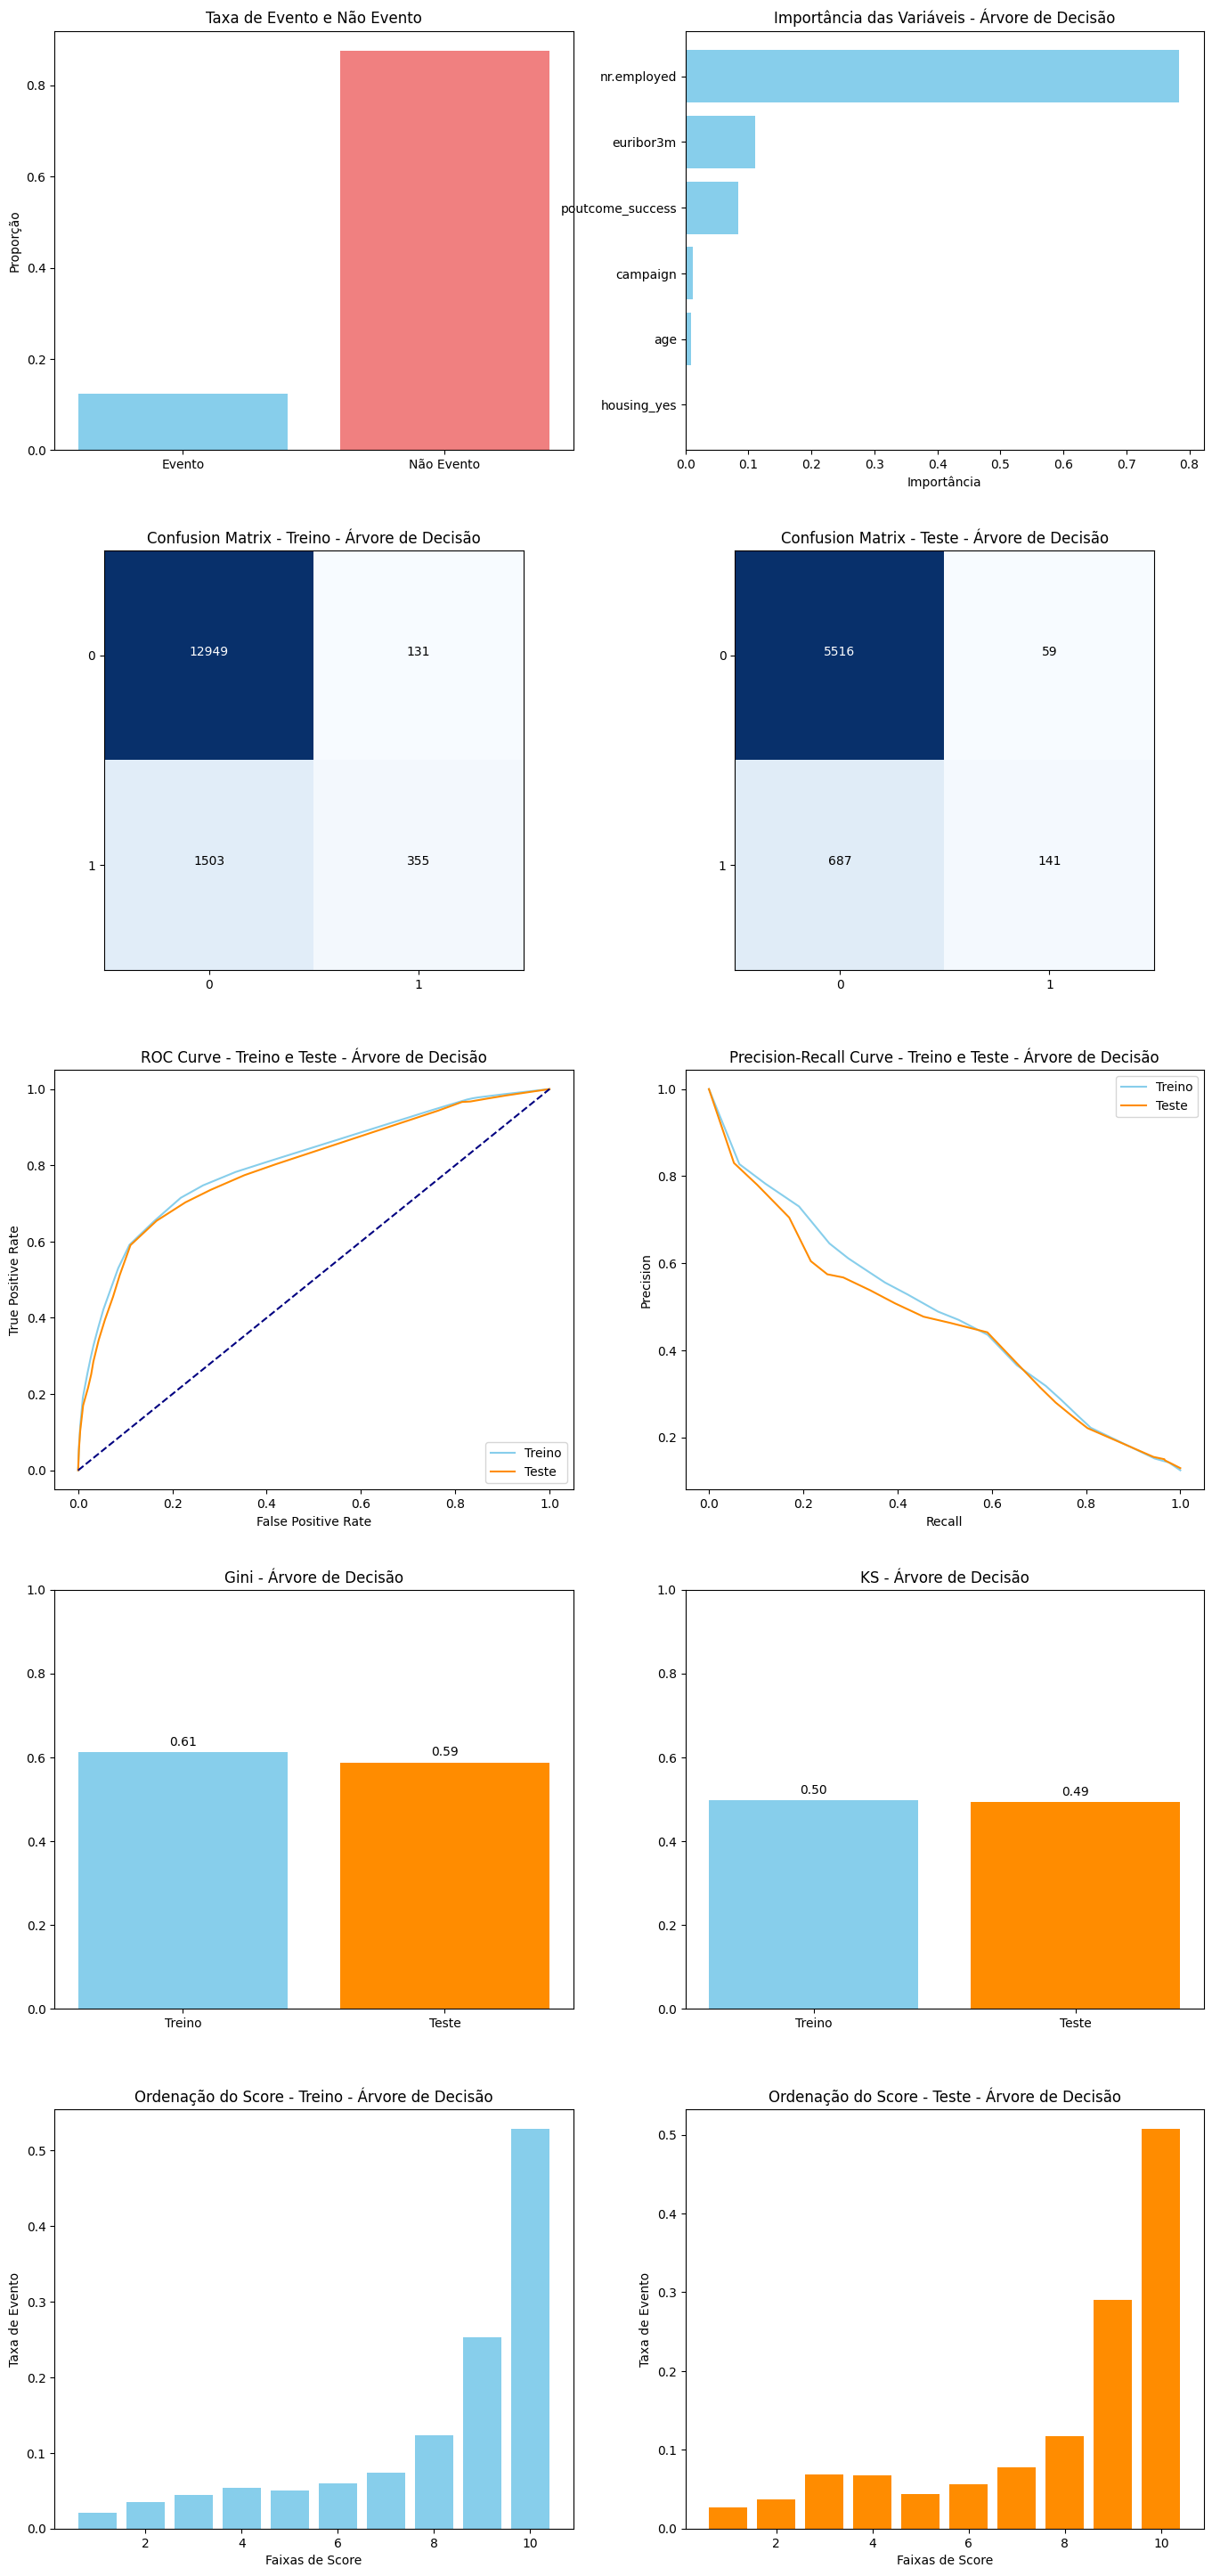

In [ ]:
fun.avaliar_modelo(X_train, y_train,X_test, y_test,best_model_AD, nm_modelo='Árvore de Decisão')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definindo o modelo
modelo_FDC = RandomForestClassifier(random_state=42)

# Grid Search reduzido
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True]
}

# Grid Search
grid_FDC = GridSearchCV(
    estimator=modelo_FDC,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Treinando o modelo
grid_FDC.fit(X_train, y_train)

# Resultados
print("Melhores Parâmetros: ", grid_FDC.best_params_)
print("Melhor AUC: ", grid_FDC.best_score_)

# Previsões
predictions_RF = grid_FDC.best_estimator_.predict(X_test)
predprob_RF = grid_FDC.best_estimator_.predict_proba(X_test)

# Gini normalizado
gini_RF = round(fun.gini_normalizado(y_test, predprob_RF[:, 1]), 2)
print('Gini normalizado --> ', gini_RF)

# Guardando o melhor modelo
best_model_rf = grid_FDC.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Melhores Parâmetros:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Melhor AUC:  0.7985074276435452
Gini normalizado -->  0.58


In [ ]:
# Resultados Random Forest
print("\n🔹 Melhores Parâmetros: ", grid_FDC.best_params_)
print("🔹 Melhor AUC (Cross-Validation): ", round(grid_FDC.best_score_, 4))


# --- Métricas de avaliação ---
accuracy_RF = accuracy_score(y_test, predictions_RF)
precision_RF = precision_score(y_test, predictions_RF)
recall_RF = recall_score(y_test, predictions_RF)
f1_RF = f1_score(y_test, predictions_RF)
roc_auc_RF = grid_FDC.best_score_

# --- Exibição dos resultados ---
print("\n📊 Resultados do Modelo Random Forest:")
print(f"Accuracy:  {accuracy_RF:.4f}")
print(f"Precision: {precision_RF:.4f}")
print(f"Recall:    {recall_RF:.4f}")
print(f"F1-Score:  {f1_RF:.4f}")
print(f"ROC AUC:   {roc_auc_RF:.4f}")
print(f"Gini:      {gini_RF:.4f}")





🔹 Melhores Parâmetros:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
🔹 Melhor AUC (Cross-Validation):  0.7985

📊 Resultados do Modelo Random Forest:
Accuracy:  0.8835
Precision: 0.7181
Recall:    0.1630
F1-Score:  0.2657
ROC AUC:   0.7985
Gini:      0.5800


/content/functions.py:221: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = y_test.groupby(deciles).mean()
/content/functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis_train = y_train.groupby(deciles_train).mean()


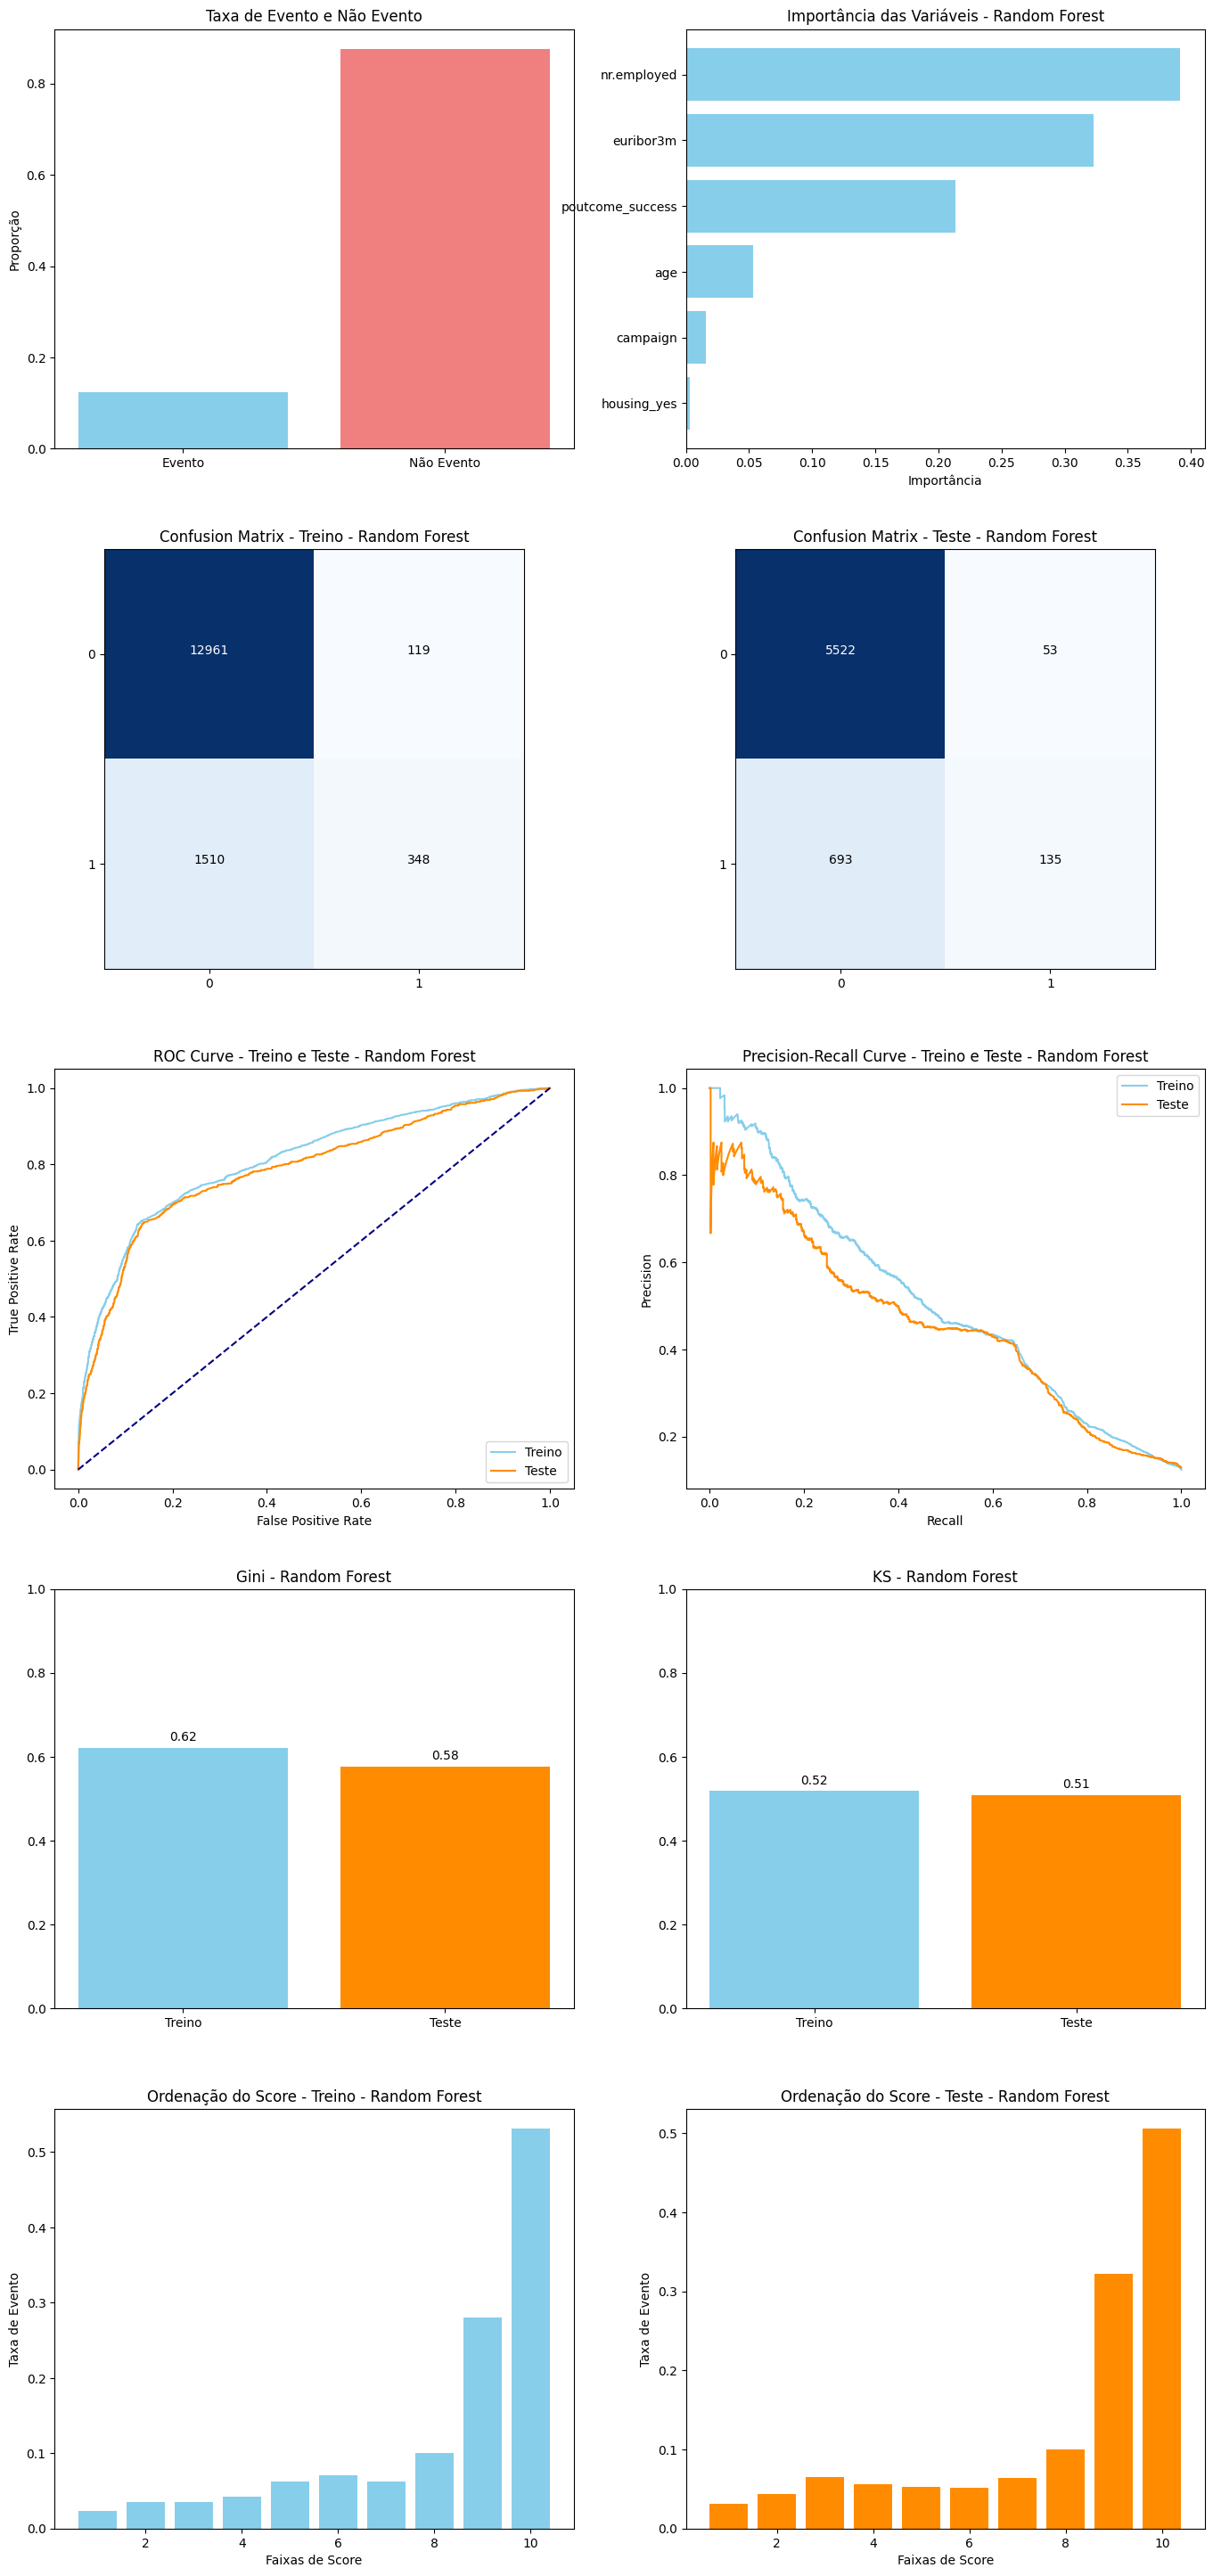

In [ ]:
fun.avaliar_modelo(X_train, y_train,X_test, y_test,best_model_rf, nm_modelo='Random Forest')

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definindo o modelo
modelo_XGB = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Grid Search reduzido (mais rápido)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1, 1.5],
    'colsample_bytree': [0.5, 0.8, 1],
    'gamma': [0, 0.1, 1],
    'min_child_weight': [1, 5, 10]
}

# Definindo o Grid Search
grid_XGB = GridSearchCV(
    estimator=modelo_XGB,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,               # usa todos os núcleos disponíveis
    verbose=2
)

# Treinando o modelo
grid_XGB.fit(X_train, y_train)

# Resultados
print("Melhores Parâmetros: ", grid_XGB.best_params_)
print("Melhor AUC: ", grid_XGB.best_score_)

# Previsões
predictions_XGB = grid_XGB.best_estimator_.predict(X_test)
predprob_XGB = grid_XGB.best_estimator_.predict_proba(X_test)

# Gini normalizado
gini_XGB = round(fun.gini_normalizado(y_test, predprob_XGB[:, 1]), 2)
print('Gini normalizado --> ', gini_XGB)

# Guardando o melhor modelo
best_model_xgb = grid_XGB.best_estimator_

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Melhores Parâmetros:  {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1}
Melhor AUC:  0.800802830383679
Gini normalizado -->  0.58


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
972 fits failed out of a total of 2916.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
972 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1803, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.1

In [ ]:
# Resultados Arvore de Decisão
print("\n🔹 Melhores Parâmetros: ", grid_XGB.best_params_)
print("🔹 Melhor AUC (Cross-Validation): ", round(grid_XGB.best_score_, 4))


# --- Métricas de avaliação ---
accuracy_XGB = accuracy_score(y_test, predictions_XGB)
precision_XGB = precision_score(y_test, predictions_XGB)
recall_XGB = recall_score(y_test, predictions_XGB)
f1_XGB = f1_score(y_test, predictions_XGB)
roc_auc_XGB = grid_XGB.best_score_

# --- Exibição dos resultados ---
print("\n📊 Resultados do Modelo XGBoost:")
print(f"Accuracy:  {accuracy_XGB:.4f}")
print(f"Precision: {precision_XGB:.4f}")
print(f"Recall:    {recall_XGB:.4f}")
print(f"F1-Score:  {f1_XGB:.4f}")
print(f"ROC AUC:   {roc_auc_XGB:.4f}")
print(f"Gini:      {gini_XGB:.4f}")

# Guardando o melhor modelo
best_model_xgb = grid_FDC.best_estimator_



🔹 Melhores Parâmetros:  {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1}
🔹 Melhor AUC (Cross-Validation):  0.8008

📊 Resultados do Modelo XGBoost:
Accuracy:  0.8840
Precision: 0.7136
Recall:    0.1715
F1-Score:  0.2765
ROC AUC:   0.8008
Gini:      0.5800


/content/functions.py:221: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = y_test.groupby(deciles).mean()
/content/functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis_train = y_train.groupby(deciles_train).mean()


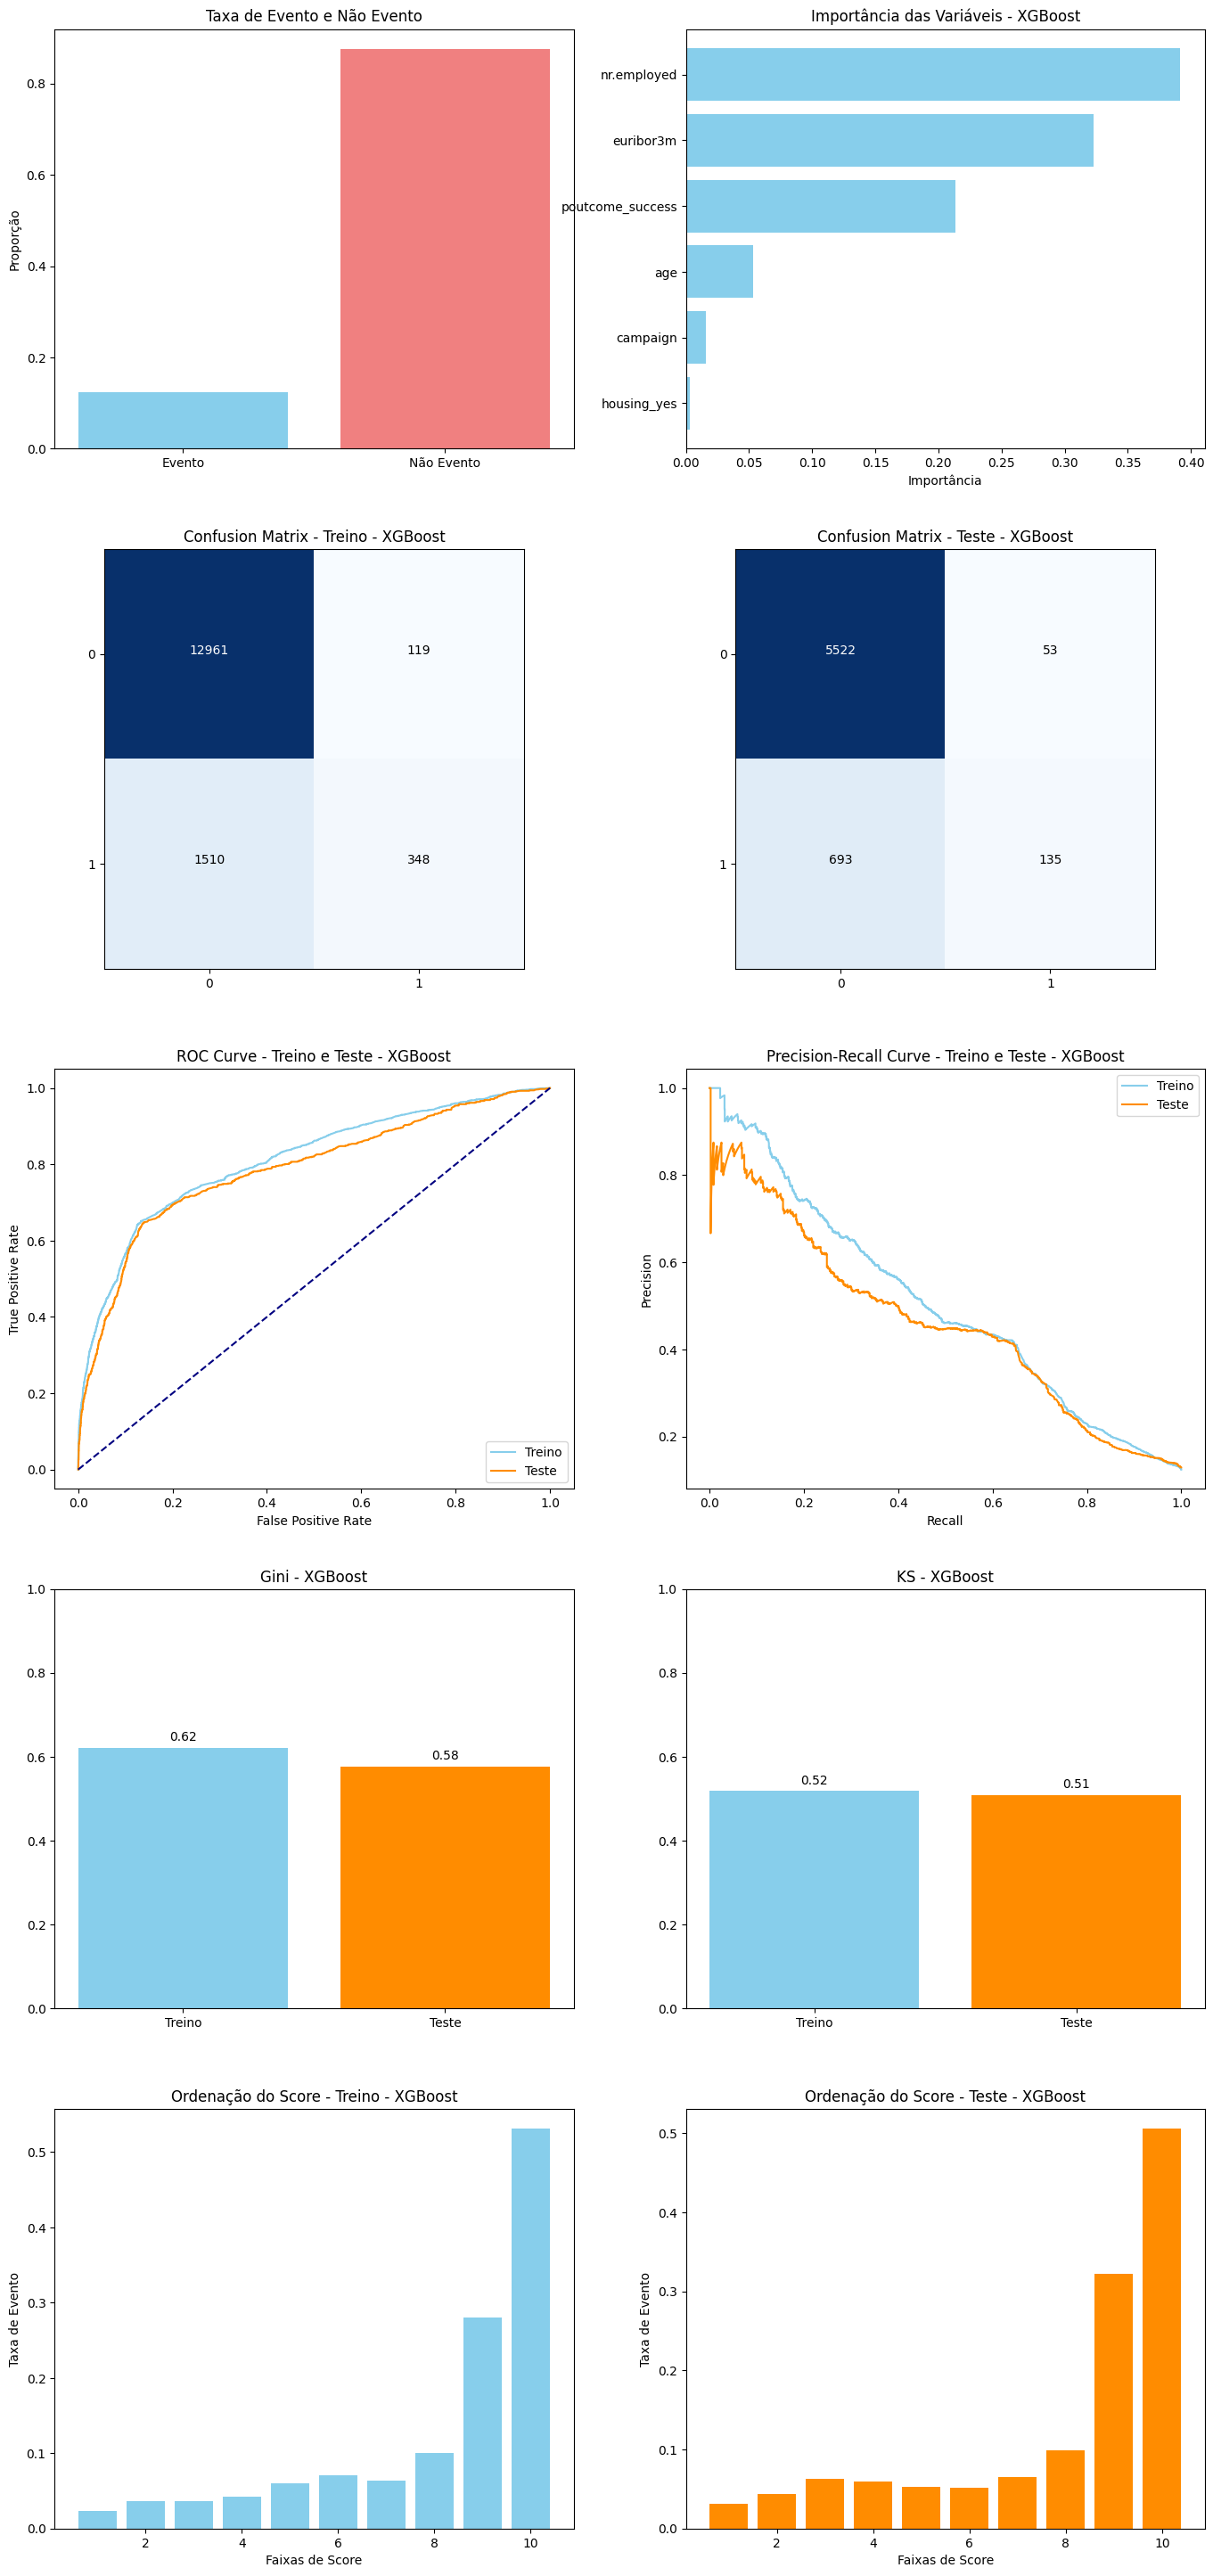

In [ ]:
fun.avaliar_modelo(X_train, y_train,X_test, y_test,best_model_xgb, nm_modelo='XGBoost')

In [ ]:
# Resultados já obtidos
resultados = {
    'Modelo': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Acurácia': [accuracy_AD, accuracy_RF, accuracy_XGB],
    'Precisão': [precision_AD, precision_RF, precision_XGB],
    'Recall': [recall_AD, recall_RF, recall_XGB],
    'F1-Score': [f1_AD, f1_RF, f1_XGB],
    'ROC AUC': [roc_auc_AD, roc_auc_RF, roc_auc_XGB],
    'Gini': [gini_AD, gini_RF, gini_XGB]
}

# Criando DataFrame
df_resultados_desbalanceados = pd.DataFrame(resultados)

# Encontrando o melhor modelo pelo AUC
melhor_auc = df_resultados_desbalanceados.loc[df_resultados_desbalanceados['ROC AUC'].idxmax()]

print("=== Comparação dos Modelos ===")
print(df_resultados_desbalanceados)

print("\n✅ Modelo que se destacou pelo AUC:")
print(f"Modelo: {melhor_auc['Modelo']}")
print(f"AUC: {melhor_auc['ROC AUC']}")
print(f"Gini Normalizado: {melhor_auc['Gini']}")

=== Comparação dos Modelos ===
          Modelo  Acurácia  Precisão    Recall  F1-Score   ROC AUC   Gini
0  Decision Tree  0.759926  0.808955  0.676654  0.736914  0.790658  0.613
1  Random Forest  0.768610  0.820359  0.684145  0.746086  0.800385  0.620
2        XGBoost  0.774194  0.815296  0.705368  0.756359  0.802916  0.620

✅ Modelo que se destacou pelo AUC:
Modelo: XGBoost
AUC: 0.8029164427072258
Gini Normalizado: 0.62


## Modelo (Dados Balanceados)

Para compreender de forma mais precisa o desempenho dos modelos, será realizada uma nova etapa de experimentação utilizando a feature target (‘y’) balanceada. O objetivo é comparar diretamente o rendimento dos mesmos algoritmos quando expostos a uma distribuição equilibrada de classes, isolando o impacto do desbalanceamento sobre as métricas. Nesse experimento, todos os hiperparâmetros permanecerão idênticos aos utilizados nos modelos anteriores, garantindo que a única alteração seja, de fato, o balanceamento da base.

O balanceamento será realizado por meio de um undersampling da classe majoritária (0/no), igualando sua quantidade ao número de observações da classe minoritária (1/yes). Em outras palavras, será selecionada uma amostra aleatória da classe 0 com o mesmo tamanho da classe 1, resultando em um conjunto de treino balanceado e adequado para avaliar como os modelos se comportam quando a proporção entre eventos e não eventos é igualada.

In [ ]:
import pandas as pd
import functions as fun
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
#Exportando o Banco de Dados do Feature Selection
abt_train_01 = pd.read_csv('/content/drive/MyDrive/Banco de Dados/Propensão de Compras de Produtos Bancários/abt_feature_selection.csv',index_col = 0)

In [ ]:
abt_train_01.shape

(21341, 7)

In [ ]:
abt_train_01.y.value_counts()

,count
y,
0,18655
1,2686


In [ ]:
# amostragem para evento e não evento
evento = abt_train_01[abt_train_01['y'] == 1]
nevento = abt_train_01[abt_train_01['y'] == 0]

# Amostragem aleatória dos negativos (reprodutível)
negativos_amostra = nevento.sample(n=len(evento), random_state=42)

# Concatenar as duas partes para obter a amostra balanceada
amostra_balanceada = pd.concat([evento, negativos_amostra])

# Embaralhar os dados (também reprodutível)
amostra_balanceada = amostra_balanceada.sample(frac=1, random_state=42).reset_index(drop=True)

amostra_balanceada.shape

(5372, 7)

É possível observar que o número total de linhas foi drasticamente reduzido (de 21.341 para 5.372 registros) em razão do processo de balanceamento. Isso ocorreu porque foi realizado um undersampling da classe majoritária (0), onde foram selecionados aleatoriamente apenas 2.686 registros, igualando-os à quantidade existente da classe minoritária (1). Dessa forma, a base torna-se balanceada com proporções equivalentes entre as duas classes.

In [ ]:
# Separando as variaveis de entrada (feature) e de saída (y)

X = amostra_balanceada.drop(columns = 'y', axis = 1)
y = amostra_balanceada['y']

# Separando em treino e test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

### Árvore de Decisão

In [ ]:
#Arvore de Decisões
from inspect import Parameter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score,recall_score
import numpy as np

#Definindo o modelo
modelo_DTC = DecisionTreeClassifier(random_state = 42)

#Definindo os paramatros para o Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10,5,3],
    'min_samples_split': [0.5,1,30],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [0.015, 0.02,0.009]
}

#Calculando a quantidade de modelo a serem treinados
n_models = np.prod([len(param_grid[param]) for param in param_grid])
print(f'Número de modelos a serem treinados: {n_models}')

#Criando o Grid Search
grid_AD = GridSearchCV(modelo_DTC,
                    cv = 5,
                    param_grid = param_grid,
                    scoring = 'roc_auc',
                    n_jobs = -1)

#Treinando o modelo
grid_AD.fit(X_train, y_train)

#Exibindo os melhores Parametros
print(f'Melhores Parametros: {grid_AD.best_params_}')

#Exibindo a melhor pontuação atingida com os hiperparametros
print(f'Melhor AUC: {grid_AD.best_score_}')

#Utilizando os modelos para fazer previsões
predictions_AD = grid_AD.best_estimator_.predict(X_test)
predprob_AD = grid_AD.best_estimator_.predict_proba(X_test)[:, 1] # Use predict_proba for AUC

gini_AD = round(2 * roc_auc_score(y_test, predprob_AD) - 1, 3)
print(f'Gini: {gini_AD}')

best_model_AD = grid_AD.best_estimator_

Número de modelos a serem treinados: 144
Melhores Parametros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 0.009, 'min_samples_split': 30, 'splitter': 'random'}
Melhor AUC: 0.7906581786030062
Gini: 0.613


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

In [ ]:
# Resultados Arvore de Decisão
print("\n🔹 Melhores Parâmetros: ", grid_AD.best_params_)
print("🔹 Melhor AUC (Cross-Validation): ", round(grid_AD.best_score_, 4))


# --- Métricas de avaliação ---
accuracy_AD = accuracy_score(y_test, predictions_AD)
precision_AD = precision_score(y_test, predictions_AD)
recall_AD = recall_score(y_test, predictions_AD)
f1_AD = f1_score(y_test, predictions_AD)
roc_auc_AD = grid_AD.best_score_
gini_AD = gini_AD

# --- Exibição dos resultados ---
print("\n📊 Resultados do Modelo Arvore de Decisão:")
print(f"Accuracy:  {accuracy_AD:.4f}")
print(f"Precision: {precision_AD:.4f}")
print(f"Recall:    {recall_AD:.4f}")
print(f"F1-Score:  {f1_AD:.4f}")
print(f"ROC AUC:   {roc_auc_AD:.4f}")
print(f"Gini:      {gini_AD:.4f}")

# Guardando o melhor modelo
best_model_AD = grid_AD.best_estimator_



🔹 Melhores Parâmetros:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 0.009, 'min_samples_split': 30, 'splitter': 'random'}
🔹 Melhor AUC (Cross-Validation):  0.7907

📊 Resultados do Modelo Arvore de Decisão:
Accuracy:  0.7599
Precision: 0.8090
Recall:    0.6767
F1-Score:  0.7369
ROC AUC:   0.7907
Gini:      0.6130


/content/functions.py:221: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = y_test.groupby(deciles).mean()
/content/functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis_train = y_train.groupby(deciles_train).mean()


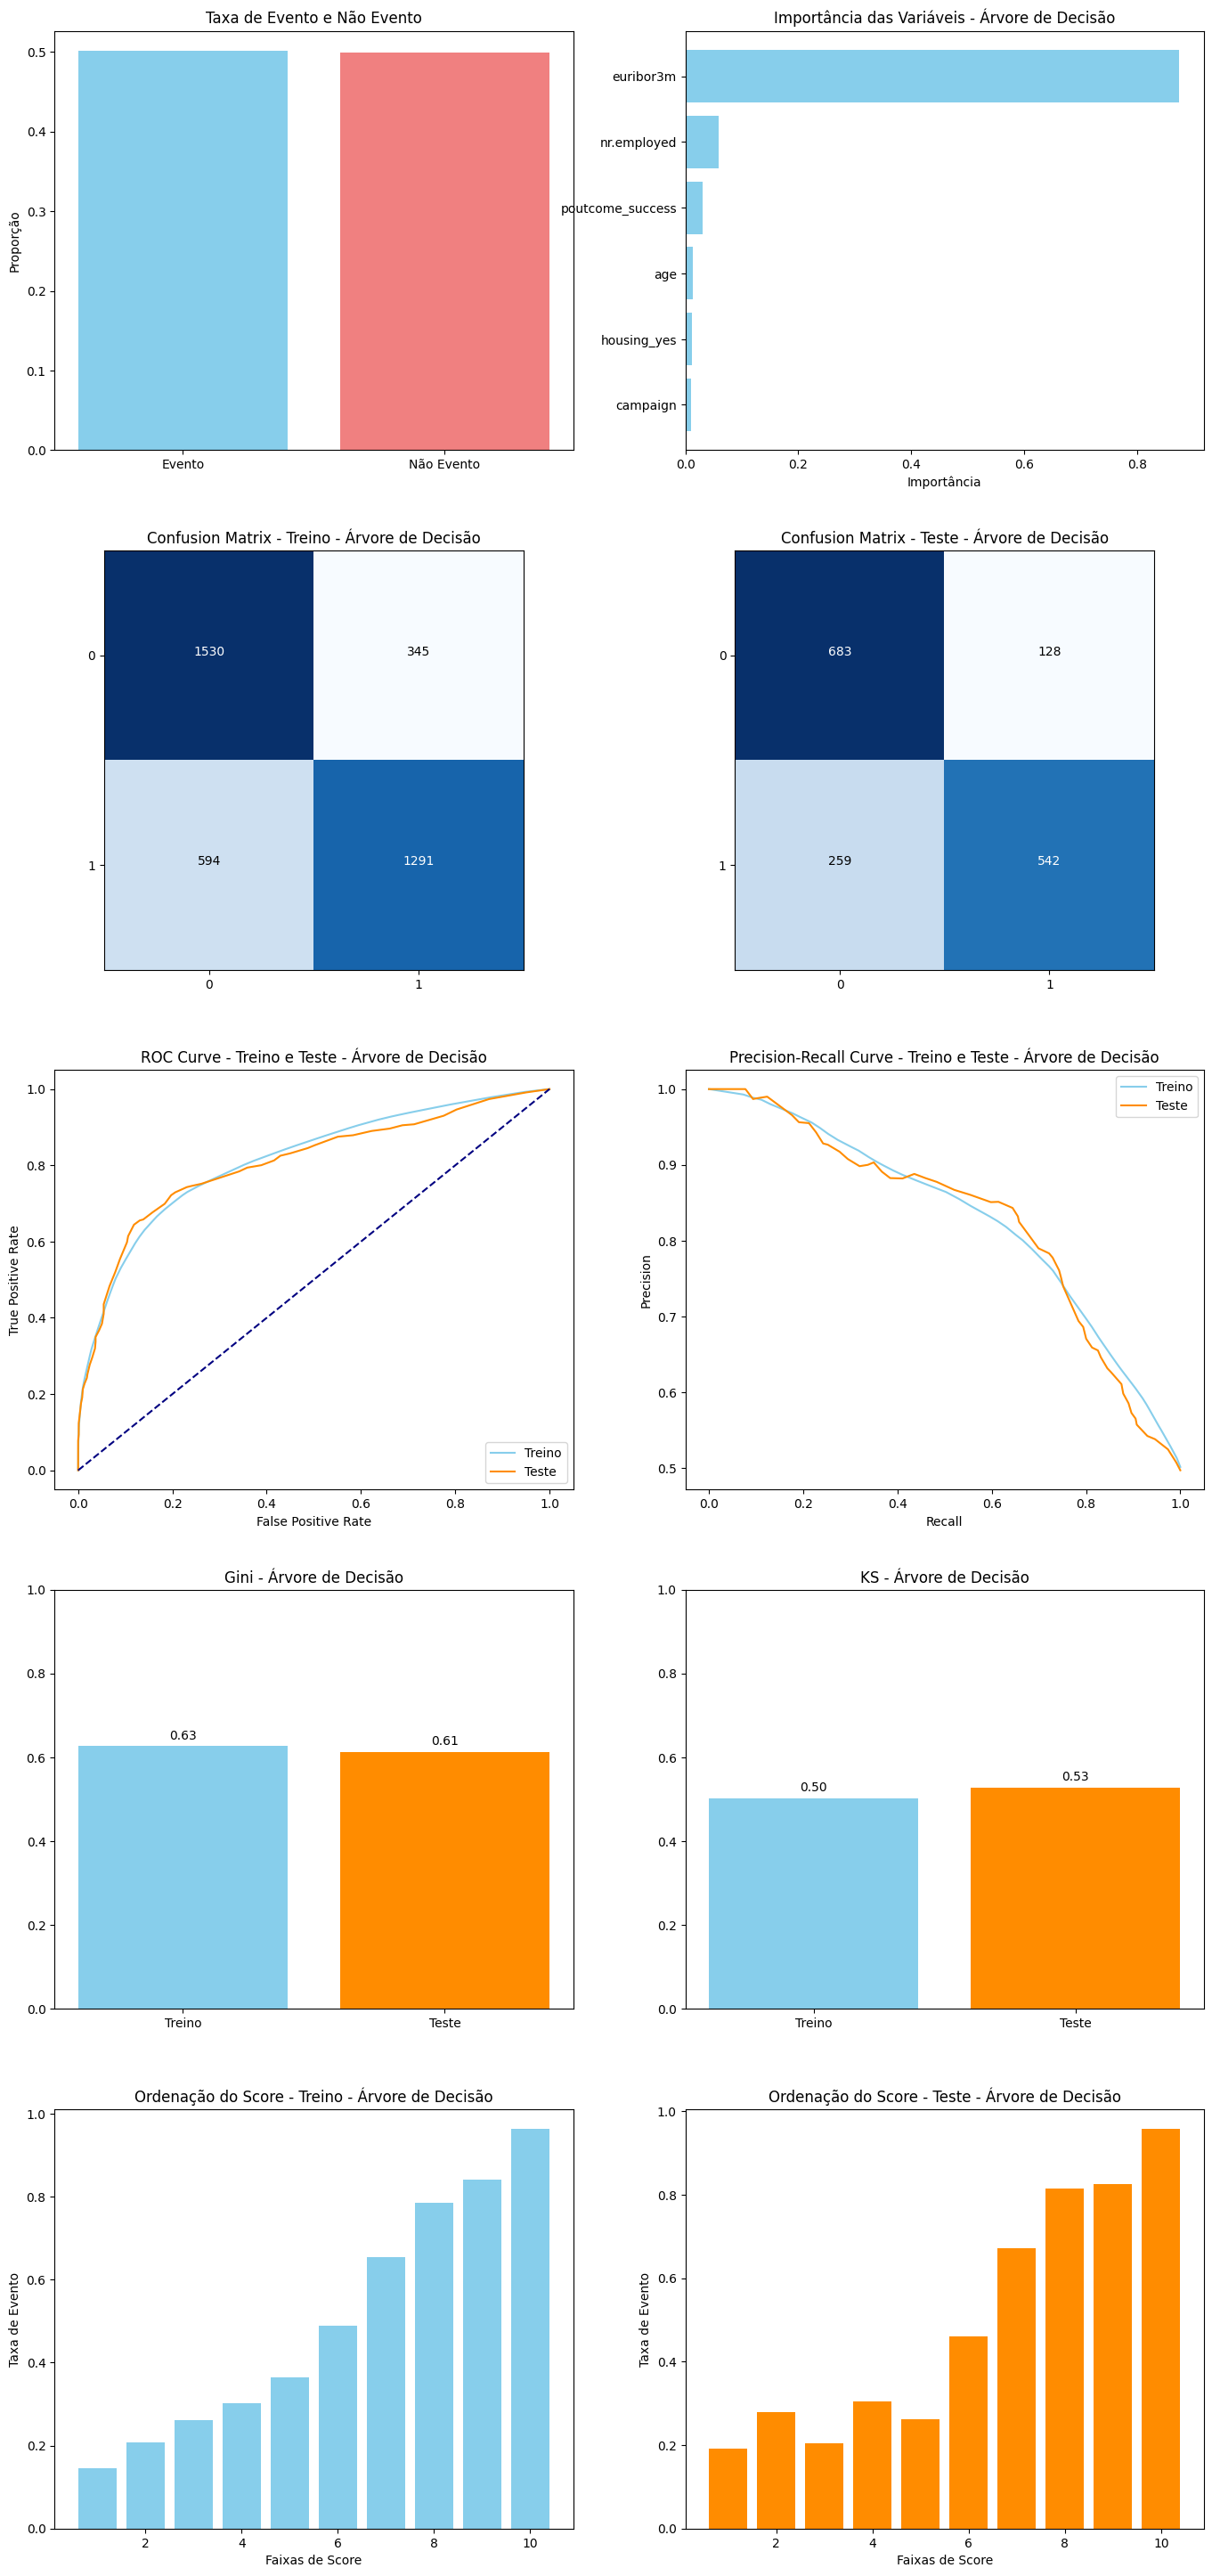

In [ ]:
fun.avaliar_modelo(X_train, y_train,X_test, y_test,best_model_AD, nm_modelo='Árvore de Decisão')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definindo o modelo
modelo_FDC = RandomForestClassifier(random_state=42)

# Grid Search reduzido (mais rápido)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True]
}

# Grid Search
grid_FDC = GridSearchCV(
    estimator=modelo_FDC,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Treinando o modelo
grid_FDC.fit(X_train, y_train)

# Resultados
print("Melhores Parâmetros: ", grid_FDC.best_params_)
print("Melhor AUC: ", grid_FDC.best_score_)

# Previsões
predictions_RF = grid_FDC.best_estimator_.predict(X_test)
predprob_RF = grid_FDC.best_estimator_.predict_proba(X_test)

# Gini normalizado
gini_RF = round(fun.gini_normalizado(y_test, predprob_RF[:, 1]), 2)
print('Gini normalizado --> ', gini_RF)

# Guardando o melhor modelo
best_model_rf = grid_FDC.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Melhores Parâmetros:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Melhor AUC:  0.800385062394729
Gini normalizado -->  0.62


In [ ]:
# Resultados Arvore de Decisão
print("\n🔹 Melhores Parâmetros: ", grid_FDC.best_params_)
print("🔹 Melhor AUC (Cross-Validation): ", round(grid_FDC.best_score_, 4))


# Métricas de avaliação
accuracy_RF = accuracy_score(y_test, predictions_RF)
precision_RF = precision_score(y_test, predictions_RF)
recall_RF = recall_score(y_test, predictions_RF)
f1_RF = f1_score(y_test, predictions_RF)
roc_auc_RF = grid_FDC.best_score_

# Exibição dos resultados
print("\n📊 Resultados do Modelo Random Forest:")
print(f"Accuracy:  {accuracy_RF:.4f}")
print(f"Precision: {precision_RF:.4f}")
print(f"Recall:    {recall_RF:.4f}")
print(f"F1-Score:  {f1_RF:.4f}")
print(f"ROC AUC:   {roc_auc_RF:.4f}")
print(f"Gini:      {gini_RF:.4f}")





🔹 Melhores Parâmetros:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
🔹 Melhor AUC (Cross-Validation):  0.8004

📊 Resultados do Modelo Random Forest:
Accuracy:  0.7686
Precision: 0.8204
Recall:    0.6841
F1-Score:  0.7461
ROC AUC:   0.8004
Gini:      0.6200


/content/functions.py:221: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = y_test.groupby(deciles).mean()
/content/functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis_train = y_train.groupby(deciles_train).mean()


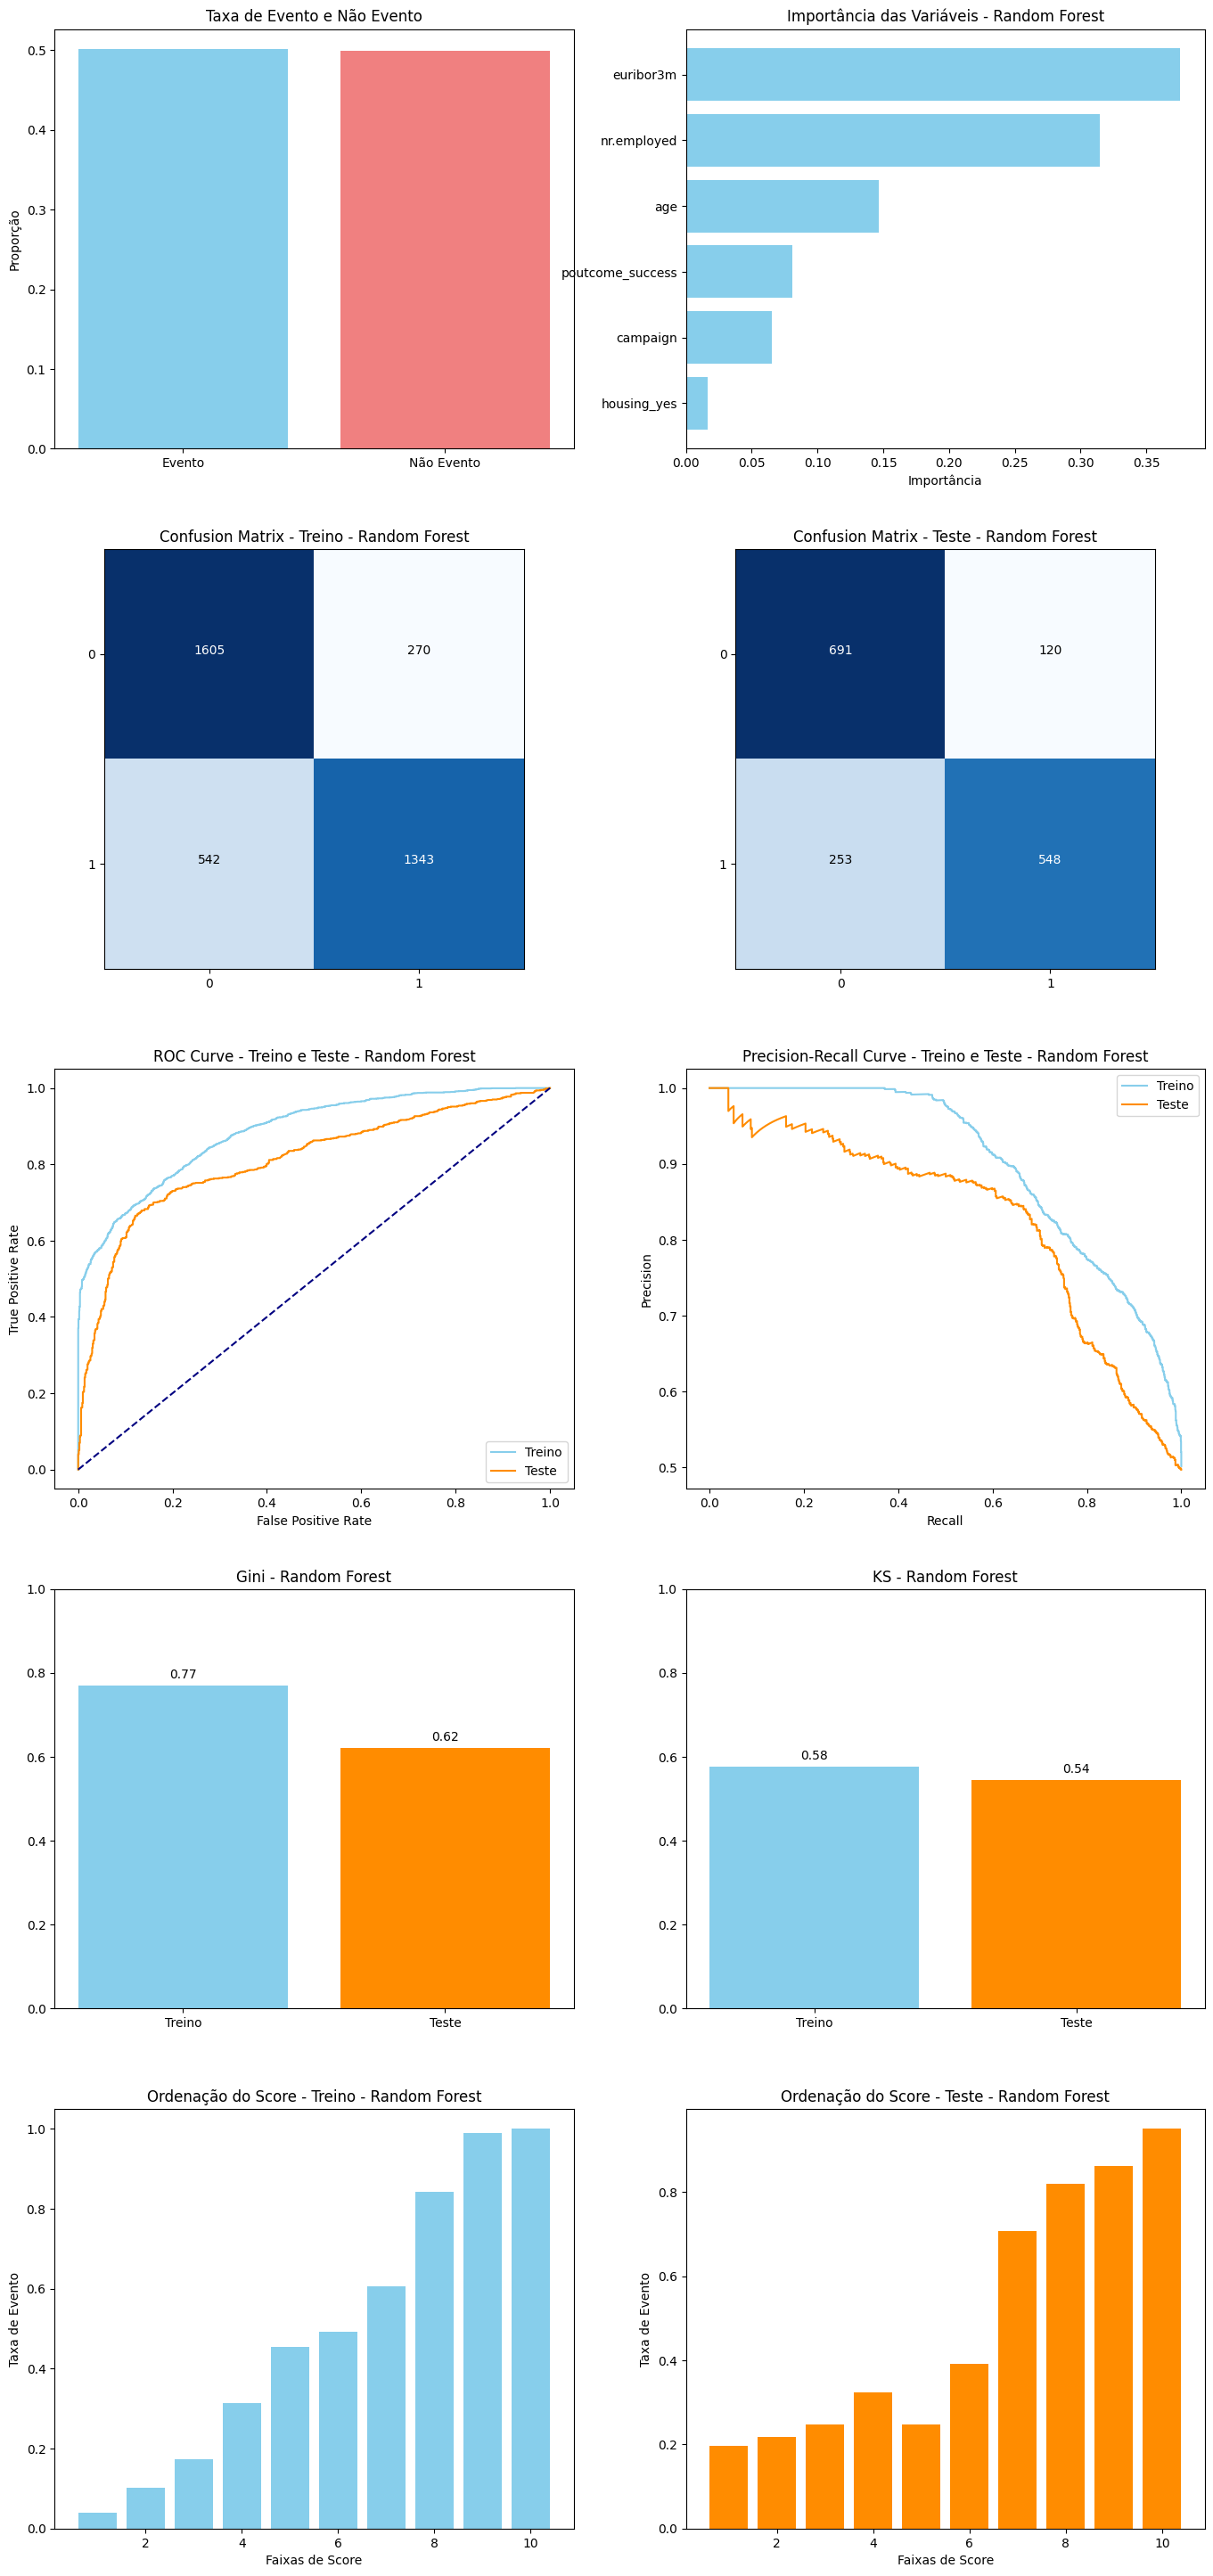

In [ ]:
fun.avaliar_modelo(X_train, y_train,X_test, y_test,best_model_rf, nm_modelo='Random Forest')

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definindo o modelo
modelo_XGB = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Grid Search

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1, 1.5],
    'colsample_bytree': [0.5, 0.8, 1],
    'gamma': [0, 0.1, 1],
    'min_child_weight': [1, 5, 10]

}

# Definindo o Grid Search
grid_XGB = GridSearchCV(
    estimator=modelo_XGB,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Treinando o modelo
grid_XGB.fit(X_train, y_train)

# Resultados
print("Melhores Parâmetros: ", grid_XGB.best_params_)
print("Melhor AUC: ", grid_XGB.best_score_)

# Previsões
predictions_XGB = grid_XGB.best_estimator_.predict(X_test)
predprob_XGB = grid_XGB.best_estimator_.predict_proba(X_test)

# Gini normalizado
gini_XGB = round(fun.gini_normalizado(y_test, predprob_XGB[:, 1]), 2)
print('Gini normalizado --> ', gini_XGB)

# Guardando o melhor modelo
best_model_xgb = grid_XGB.best_estimator_

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Melhores Parâmetros:  {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Melhor AUC:  0.8029164427072258
Gini normalizado -->  0.62


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
972 fits failed out of a total of 2916.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
972 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1803, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.1

In [ ]:
# Resultados Arvore de Decisão
print("\n🔹 Melhores Parâmetros: ", grid_XGB.best_params_)
print("🔹 Melhor AUC (Cross-Validation): ", round(grid_XGB.best_score_, 4))


# --- Métricas de avaliação ---
accuracy_XGB = accuracy_score(y_test, predictions_XGB)
precision_XGB = precision_score(y_test, predictions_XGB)
recall_XGB = recall_score(y_test, predictions_XGB)
f1_XGB = f1_score(y_test, predictions_XGB)
roc_auc_XGB = grid_XGB.best_score_

# --- Exibição dos resultados ---
print("\n📊 Resultados do Modelo XGBoost:")
print(f"Accuracy:  {accuracy_XGB:.4f}")
print(f"Precision: {precision_XGB:.4f}")
print(f"Recall:    {recall_XGB:.4f}")
print(f"F1-Score:  {f1_XGB:.4f}")
print(f"ROC AUC:   {roc_auc_XGB:.4f}")
print(f"Gini:      {gini_XGB:.4f}")

# Guardando o melhor modelo
best_model_xgb = grid_XGB.best_estimator_



🔹 Melhores Parâmetros:  {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
🔹 Melhor AUC (Cross-Validation):  0.8029

📊 Resultados do Modelo XGBoost:
Accuracy:  0.7742
Precision: 0.8153
Recall:    0.7054
F1-Score:  0.7564
ROC AUC:   0.8029
Gini:      0.6200


/content/functions.py:221: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = y_test.groupby(deciles).mean()
/content/functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis_train = y_train.groupby(deciles_train).mean()


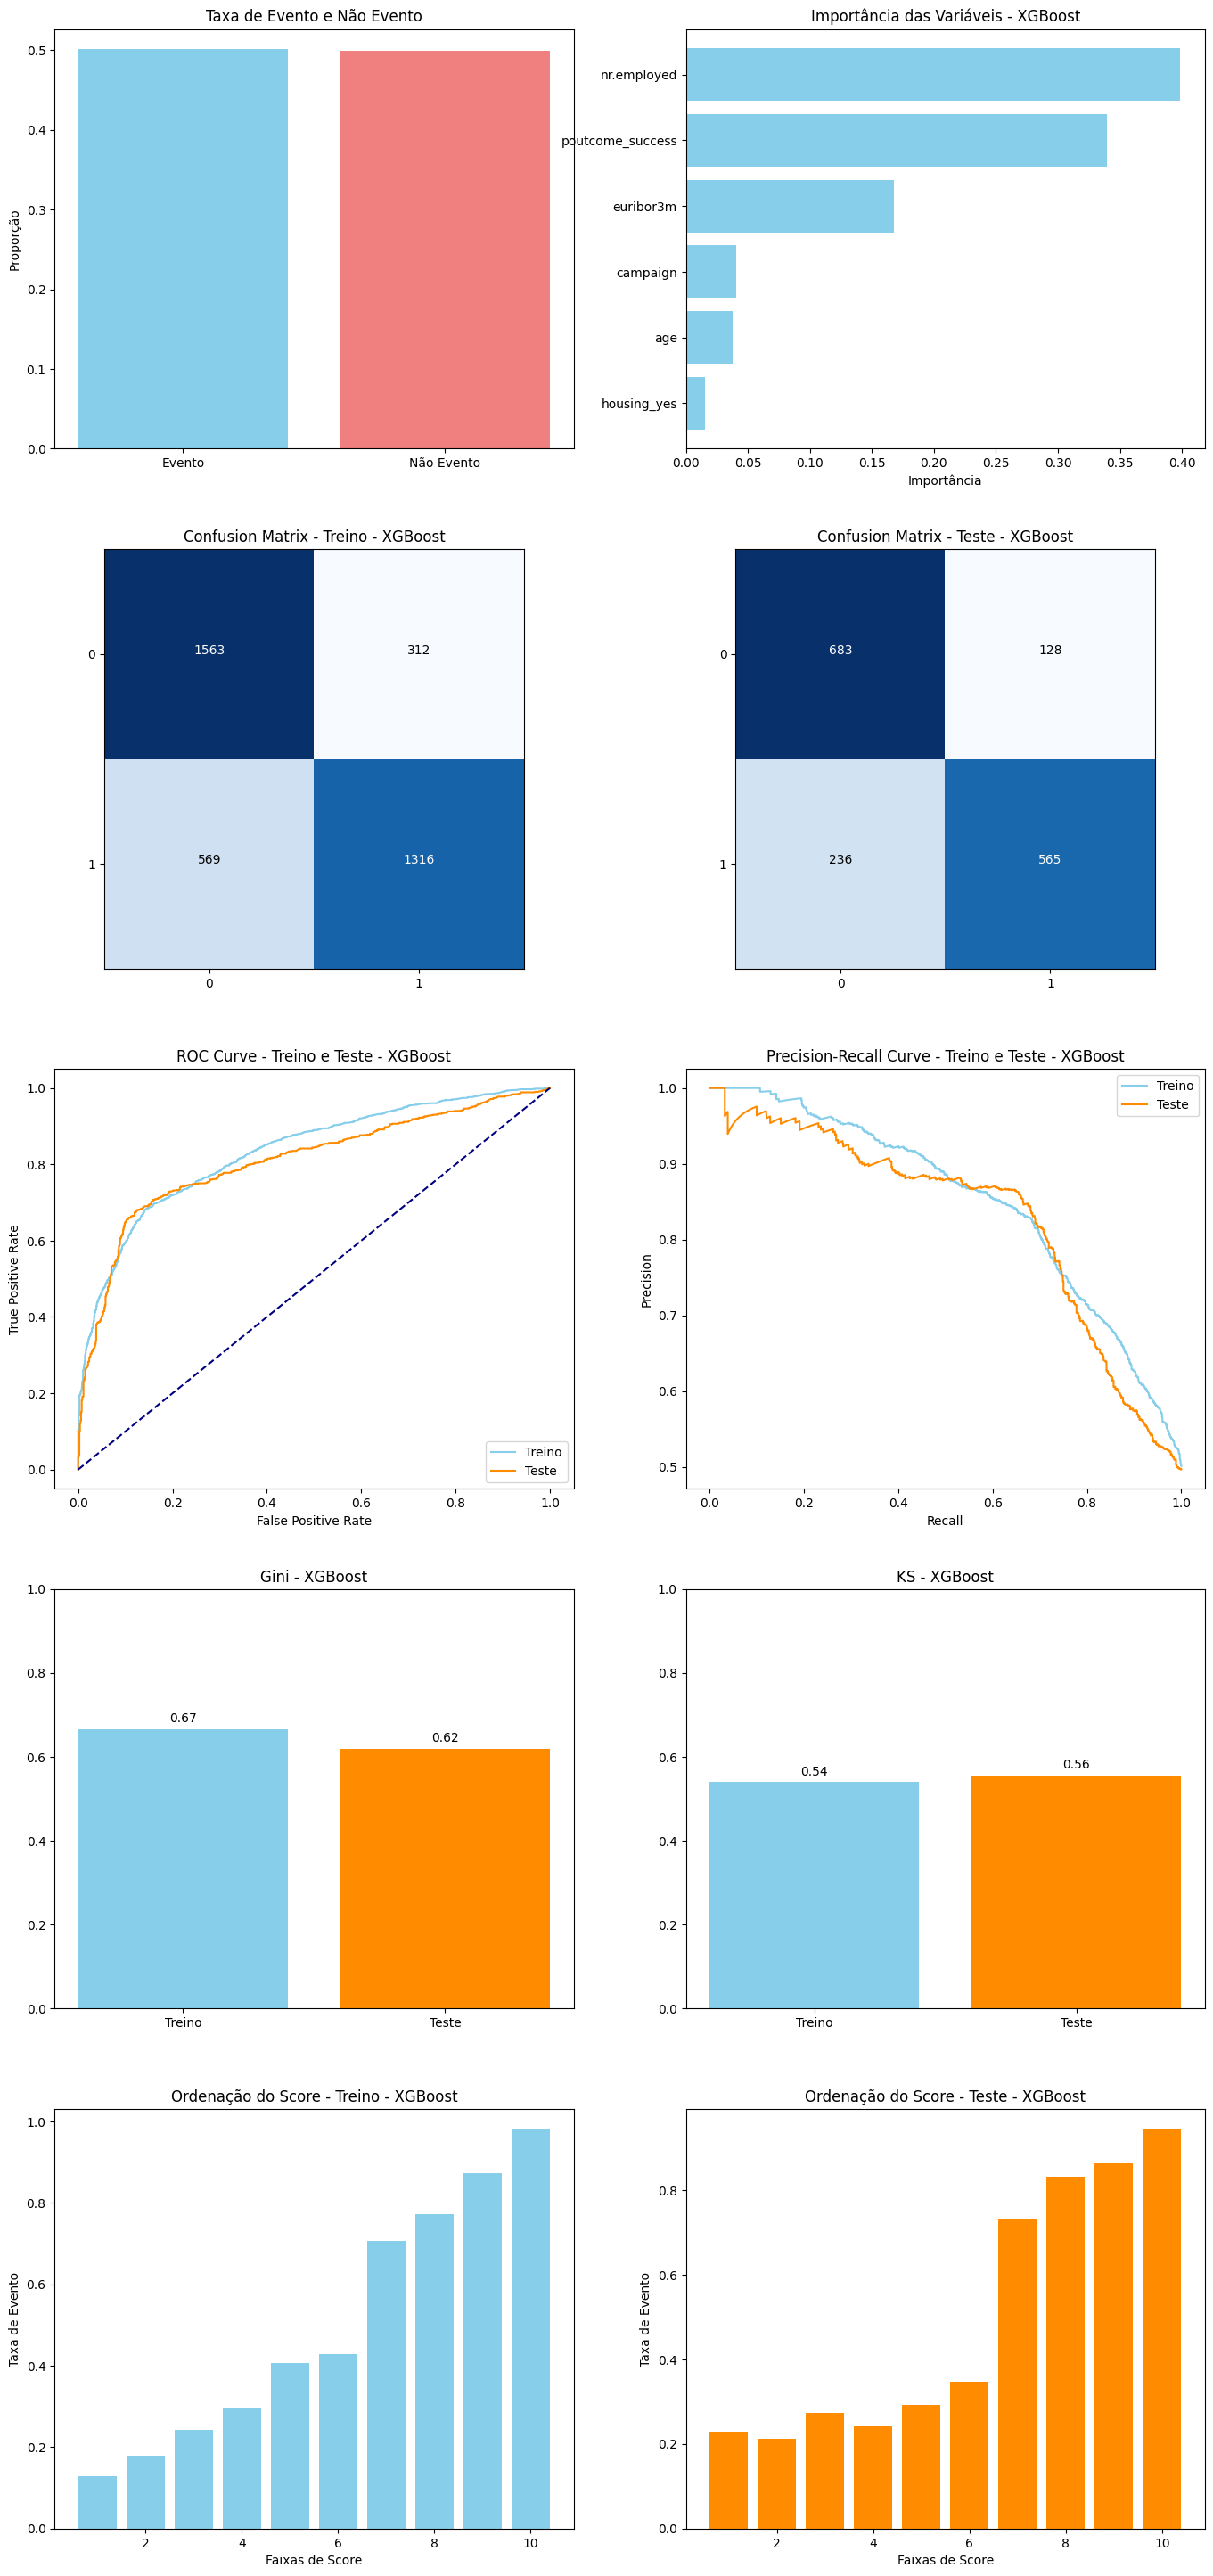

In [ ]:
fun.avaliar_modelo(X_train, y_train,X_test, y_test,best_model_xgb, nm_modelo='XGBoost')

In [ ]:
# Resultados
resultados = {
    'Modelo': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Acurácia': [accuracy_AD, accuracy_RF, accuracy_XGB],
    'Precisão': [precision_AD, precision_RF, precision_XGB],
    'Recall': [recall_AD, recall_RF, recall_XGB],
    'F1-Score': [f1_AD, f1_RF, f1_XGB],
    'ROC AUC': [roc_auc_AD, roc_auc_RF, roc_auc_XGB],
    'Gini': [gini_AD, gini_RF, gini_XGB]
}

# Criando DataFrame
df_resultados_balanceados = pd.DataFrame(resultados)

# Encontrando o melhor modelo pelo AUC
melhor_auc = df_resultados_balanceados.loc[df_resultados_balanceados['ROC AUC'].idxmax()]

print("=== Comparação dos Modelos ===")
print(df_resultados_balanceados)

print("\n✅ Modelo que se destacou pelo AUC:")
print(f"Modelo: {melhor_auc['Modelo']}")
print(f"AUC: {melhor_auc['ROC AUC']}")
print(f"Gini Normalizado: {melhor_auc['Gini']}")

=== Comparação dos Modelos ===
          Modelo  Acurácia  Precisão    Recall  F1-Score   ROC AUC   Gini
0  Decision Tree  0.759926  0.808955  0.676654  0.736914  0.790658  0.613
1  Random Forest  0.768610  0.820359  0.684145  0.746086  0.800385  0.620
2        XGBoost  0.774194  0.815296  0.705368  0.756359  0.802916  0.620

✅ Modelo que se destacou pelo AUC:
Modelo: XGBoost
AUC: 0.8029164427072258
Gini Normalizado: 0.62


In [ ]:
# Adicionando a origem dos resultados
df_resultados_balanceados['Tipo'] = 'Balanceado'
df_resultados_desbalanceados['Tipo'] = 'Desbalanceado'

# Unindo os dois DataFrames
df_comparativo = pd.concat([df_resultados_balanceados, df_resultados_desbalanceados], ignore_index=True)

# Encontrando o melhor modelo pelo ROC AUC
melhor_modelo_auc = df_comparativo.loc[df_comparativo['ROC AUC'].idxmax()]

print("=== Comparação entre Modelos Balanceados e Desbalanceados ===")
print(df_comparativo.head(10).to_string(index=False))

print("\n✅ Modelo com melhor ROC AUC:")
print(f"Modelo: {melhor_modelo_auc['Modelo']}")
print(f"Tipo de Base: {melhor_modelo_auc['Tipo']}")
print(f"ROC AUC: {melhor_modelo_auc['ROC AUC']:.4f}")
print(f"Gini: {melhor_modelo_auc['Gini']:.4f}")

=== Comparação entre Modelos Balanceados e Desbalanceados ===
       Modelo  Acurácia  Precisão   Recall  F1-Score  ROC AUC  Gini          Tipo
Decision Tree  0.759926  0.808955 0.676654  0.736914 0.790658 0.613    Balanceado
Random Forest  0.768610  0.820359 0.684145  0.746086 0.800385 0.620    Balanceado
      XGBoost  0.774194  0.815296 0.705368  0.756359 0.802916 0.620    Balanceado
Decision Tree  0.759926  0.808955 0.676654  0.736914 0.790658 0.613 Desbalanceado
Random Forest  0.768610  0.820359 0.684145  0.746086 0.800385 0.620 Desbalanceado
      XGBoost  0.774194  0.815296 0.705368  0.756359 0.802916 0.620 Desbalanceado

✅ Modelo com melhor ROC AUC:
Modelo: XGBoost
Tipo de Base: Balanceado
ROC AUC: 0.8029
Gini: 0.6200


In [ ]:
# Adicionando a origem dos resultados
df_resultados_balanceados['Tipo'] = 'Balanceado'
df_resultados_desbalanceados['Tipo'] = 'Desbalanceado'

# Unindo os dois DataFrames
df_comparativo = pd.concat([df_resultados_balanceados, df_resultados_desbalanceados], ignore_index=True)

# Criando uma métrica composta (média entre ROC AUC e Gini)
df_comparativo['Score_Combinado'] = (df_comparativo['ROC AUC'] + df_comparativo['Gini']) / 2

# Selecionando o melhor modelo pelo score combinado
melhor_modelo = df_comparativo.loc[df_comparativo['Score_Combinado'].idxmax()]

print("=== Comparação entre Modelos Balanceados e Desbalanceados ===")
print(df_comparativo[['Modelo', 'Tipo', 'ROC AUC', 'Gini', 'Score_Combinado']])

print("\n✅ Melhor Modelo considerando ROC AUC + Gini:")
print(f"Modelo: {melhor_modelo['Modelo']}")
print(f"Tipo de Base: {melhor_modelo['Tipo']}")
print(f"ROC AUC: {melhor_modelo['ROC AUC']:.4f}")
print(f"Gini: {melhor_modelo['Gini']:.4f}")
print(f"Score Combinado: {melhor_modelo['Score_Combinado']:.4f}")

=== Comparação entre Modelos Balanceados e Desbalanceados ===
          Modelo           Tipo   ROC AUC   Gini  Score_Combinado
0  Decision Tree     Balanceado  0.790658  0.613         0.701829
1  Random Forest     Balanceado  0.800385  0.620         0.710193
2        XGBoost     Balanceado  0.802916  0.620         0.711458
3  Decision Tree  Desbalanceado  0.792249  0.587         0.689624
4  Random Forest  Desbalanceado  0.798507  0.580         0.689254
5        XGBoost  Desbalanceado  0.800803  0.580         0.690401

✅ Melhor Modelo considerando ROC AUC + Gini:
Modelo: XGBoost
Tipo de Base: Balanceado
ROC AUC: 0.8029
Gini: 0.6200
Score Combinado: 0.7115
